# Pr√°ctica de de la hacienda en potreros 

## Objetivos  

* Verificaci√≥n del √°rea de un potrero 

## C√≥mo lo hace

1. Identifica la forma geom√©trica del potrero. 

In [1]:
def area_potrero_triangular(a,b,c):
    """
    Calcula el √°rea de un tri√°ngulo dado sus lados a, b y c
    usando la f√≥rmula de Her√≥n.
    """
    s = (a + b + c) / 2
    return (s * (s - a) * (s - b) * (s - c)) ** 0.5

In [2]:
area_potrero_triangular(169.64, 132.82, 212.16)

11260.299616485832

In [3]:
area_potrero_triangular(1,1,1.42)

0.4999831897174144

Para visualizar el contenido del PDF como una imagen usando Python y matplotlib, puedes usar la biblioteca `PyMuPDF` (tambi√©n conocida como `fitz`). Aqu√≠ tienes el c√≥digo:


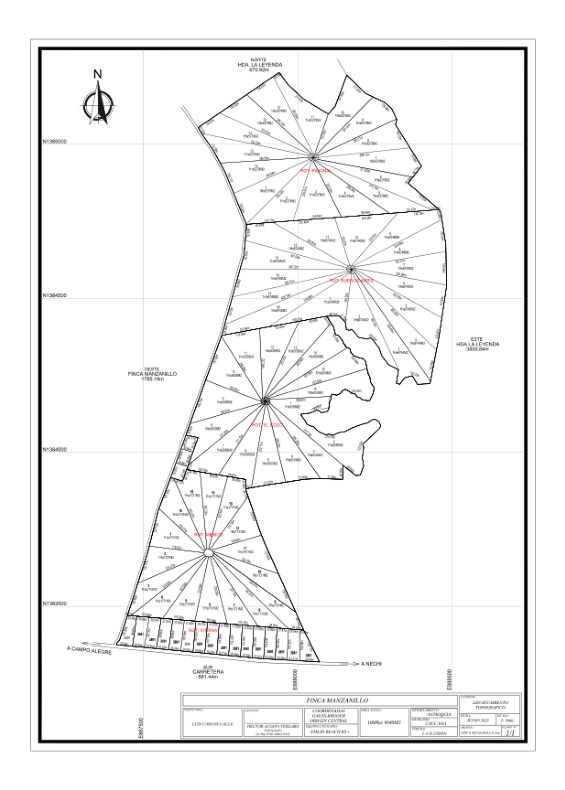

In [6]:
import fitz  # PyMuPDF
import matplotlib.pyplot as plt
from PIL import Image
import io

def display_pdf_as_image(pdf_path):
    # Abrir el archivo PDF
    doc = fitz.open(pdf_path)
    
    # Verificar si el PDF tiene p√°ginas
    if len(doc) == 0:
        print("El PDF no contiene p√°ginas.")
        return
    
    # Seleccionar la primera p√°gina
    page = doc.load_page(0)
    
    # Renderizar la p√°gina como una imagen (pix)
    pix = page.get_pixmap()
    
    # Convertir la imagen a bytes en formato PNG usando Pillow
    img_bytes = pix.tobytes("png")  # Cambiamos a PNG
    
    # Cargar la imagen desde bytes con Pillow
    img = Image.open(io.BytesIO(img_bytes))
    
    # Mostrar la imagen con matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')  # Ocultar ejes
    plt.show()
    
    # Cerrar el documento
    doc.close()

# Llamar a la funci√≥n con la ruta de tu PDF
display_pdf_as_image("finca_manzanillos.pdf")


### Instalaci√≥n de dependencias:
Necesitar√°s instalar las siguientes bibliotecas si no las tienes ya:
```bash
pip install pymupdf matplotlib
```

### Notas:
1. Este c√≥digo renderiza la primera p√°gina del PDF como una imagen y la muestra usando matplotlib.
2. Aseg√∫rate de que el archivo `finca_manzanillos.pdf` est√© en el mismo directorio que tu script Python, o proporciona la ruta completa al archivo.
3. Si el PDF contiene m√∫ltiples p√°ginas, puedes modificar el c√≥digo para mostrar otras p√°ginas cambiando el √≠ndice en `doc.load_page()`.

El resultado ser√° una visualizaci√≥n del contenido de la primera p√°gina del PDF como una imagen.

# Las coordenadas Gauss-Kr√ºger en la divisi√≥n de haciendas en potreros de igual √°rea  


Las **coordenadas Gauss-Kr√ºger** (tambi√©n conocidas como coordenadas UTM, Universal Transverse Mercator, en su versi√≥n global) son un sistema de proyecci√≥n cartogr√°fica que divide la Tierra en zonas para minimizar las distorsiones. En el contexto de la **divisi√≥n de haciendas en potreros de igual √°rea**, este sistema es √∫til porque permite mediciones precisas de distancias y superficies dentro de una misma zona.

### **Origen Central en Gauss-Kr√ºger**
- Cada zona en Gauss-Kr√ºger tiene un **meridiano central** (origen de longitudes) y el **ecuador** como origen de latitudes.
- En Argentina, por ejemplo, se usan zonas de 3¬∞ o 6¬∞ de ancho, con meridianos centrales como 69¬∞O (zona 2), 63¬∞O (zona 3), etc.
- Las coordenadas se expresan en metros:  
  - **Este (X)**: Distancia al meridiano central + 500.000 m (para evitar valores negativos).  
  - **Norte (Y)**: Distancia al ecuador.

### **Aplicaci√≥n en Divisi√≥n de Haciendas en Potreros de Igual √Årea**
1. **Georreferenciaci√≥n de linderos**:  
   - Se mapean los l√≠mites de la hacienda con coordenadas Gauss-Kr√ºger usando GPS o topograf√≠a.  
   - Esto permite calcular el **√°rea total** con precisi√≥n.

2. **C√°lculo de subdivisiones**:  
   - Si se requiere dividir en **N potreros de igual √°rea**, se calcula el √°rea objetivo para cada uno:  
     $$
     \text{√Årea por potrero} = \frac{\text{√Årea total}}{N}
     $$
   - Usando software (como QGIS, AutoCAD Civil 3D o herramientas topogr√°ficas), se trazan l√≠neas (paralelas o radiales) que dividan el terreno en partes iguales.

3. **Minimizaci√≥n de distorsiones**:  
   - Como Gauss-Kr√ºger preserva √°reas dentro de una zona, las subdivisiones mantendr√°n la proporci√≥n correcta.  
   - Si la hacienda cruza zonas, se debe hacer una transformaci√≥n de coordenadas para evitar errores.

4. **Optimizaci√≥n de formas**:  
   - Se pueden usar algoritmos de **partici√≥n de pol√≠gonos** para que los potreros tengan formas pr√°cticas (rectangulares, trapezoidales, etc.), facilitando el manejo ganadero o agr√≠cola.

### **Ejemplo Pr√°ctico**
- **Hacienda de 100 hect√°reas** ‚Üí Dividir en **5 potreros de 20 ha cada uno**.  
- Se georreferencian los v√©rtices con Gauss-Kr√ºger.  
- Usando curvas de nivel y accesos, se trazan divisiones (ej. paralelas a un camino principal) ajustando los l√≠mites hasta que cada pol√≠gono interno tenga 20 ha.

### **Herramientas Recomendadas**
- **Software SIG**: QGIS, ArcGIS (con herramientas de "divisi√≥n de parcelas").  
- **Topograf√≠a**: Estaci√≥n total o GNSS RTK para precisi√≥n centim√©trica.  
- **C√°lculo manual**: Si el terreno es regular, se puede dividir con f√≥rmulas geom√©tricas (tri√°ngulos, trapecios).

### **Conclusi√≥n**
El sistema Gauss-Kr√ºger es ideal para esta aplicaci√≥n porque:  
‚úî **Minimiza errores de √°rea** dentro de una zona.  
‚úî Permite **trabajar en metros** (m√°s intuitivo que grados).  
‚úî Facilita la integraci√≥n con sistemas catastrales modernos.  

¬øNecesitas ayuda con un caso concreto de divisi√≥n de terrenos?

# Secuencia did√°ctica para dividir una hacienda en potreros de igual √°rea usando Python y coordenadas UTM  


Aqu√≠ tienes una **secuencia did√°ctica** para ense√±ar a tus estudiantes de Ingenier√≠a Agropecuaria c√≥mo usar **Python en Jupyter Notebooks** para dividir una hacienda en potreros de igual √°rea utilizando coordenadas **Gauss-Kr√ºger (UTM)**. Incluir√© scripts pr√°cticos con datos simulados de una finca en Antioquia, Colombia.

---

## **Secuencia Did√°ctica**  
### **1. Introducci√≥n te√≥rica (15 min)**  
- Explicar qu√© son las coordenadas Gauss-Kr√ºger/UTM y su importancia en agrimensura.  
- Mostrar c√≥mo se aplican en la divisi√≥n de terrenos.  
- Presentar el caso pr√°ctico: **Dividir una hacienda en potreros de igual √°rea**.  

### **2. Configuraci√≥n del entorno (10 min)**  
- Abrir Jupyter Notebook.  
- Instalar librer√≠as necesarias:  


In [8]:
!pip install geopandas shapely matplotlib pyproj



  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached shapely-2.1.0-cp312-cp312-win_amd64.whl.metadata (7.0 kB)
  Using cached pyproj-3.7.1-cp312-cp312-win_amd64.whl.metadata (31 kB)
  Using cached pyogrio-0.10.0-cp312-cp312-win_amd64.whl.metadata (5.6 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
Using cached shapely-2.1.0-cp312-cp312-win_amd64.whl (1.7 MB)
Using cached pyproj-3.7.1-cp312-cp312-win_amd64.whl (6.3 MB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pyogrio-0.10.0-cp312-cp312-win_amd64.whl (16.2 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/7 [pytz]
   -------------------------------------


### **3. Carga y visualizaci√≥n de datos (20 min)**  
- Usaremos datos **simulados** de una finca en Antioquia (Zona UTM 18N).  
- Script para cargar y graficar los linderos:  


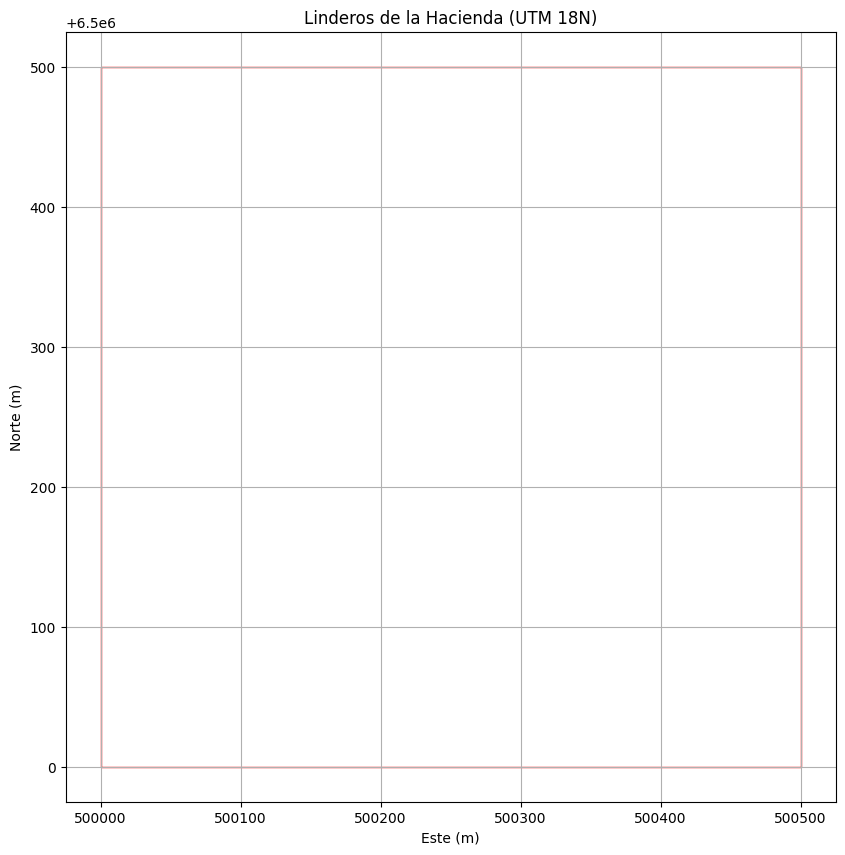

In [14]:

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Coordenadas UTM Zona 18N (Este, Norte) - Ejemplo ficticio de linderos de una finca en Antioquia
coordenadas_utm = [
    (500000, 6500000),  # Punto A
    (500500, 6500000),  # Punto B
    (500500, 6500500),  # Punto C
    (500000, 6500500),  # Punto D
    (500000, 6500000)   # Cerrar pol√≠gono (igual al punto A)
]

# Crear pol√≠gono y GeoDataFrame
poligono_finca = Polygon(coordenadas_utm)
gdf_finca = gpd.GeoDataFrame(geometry=[poligono_finca], crs="EPSG:32618")  # EPSG:32618 = UTM 18N

# Graficar
gdf_finca.plot(edgecolor='red', facecolor='none', figsize=(10, 10))
plt.title("Linderos de la Hacienda (UTM 18N)")
plt.xlabel("Este (m)")
plt.ylabel("Norte (m)")
plt.grid()
plt.show()




### **4. C√°lculo del √°rea total (10 min)**  
- Calcular el √°rea en hect√°reas:  


In [15]:

area_total_ha = gdf_finca.geometry.area.values[0] / 10000  # m¬≤ ‚Üí ha
print(f"√Årea total de la hacienda: {area_total_ha:.2f} ha")



√Årea total de la hacienda: 25.00 ha


*(Salida: `√Årea total de la hacienda: 25.00 ha` si es un cuadrado de 500x500 m)*  

### **5. Divisi√≥n en potreros de igual √°rea (30 min)**  
- **Objetivo**: Dividir en `N` potreros de igual √°rea.  
- **M√©todo**: Usar **l√≠neas paralelas** para dividir el terreno.  


Cada potrero tendr√°: 5.00 ha


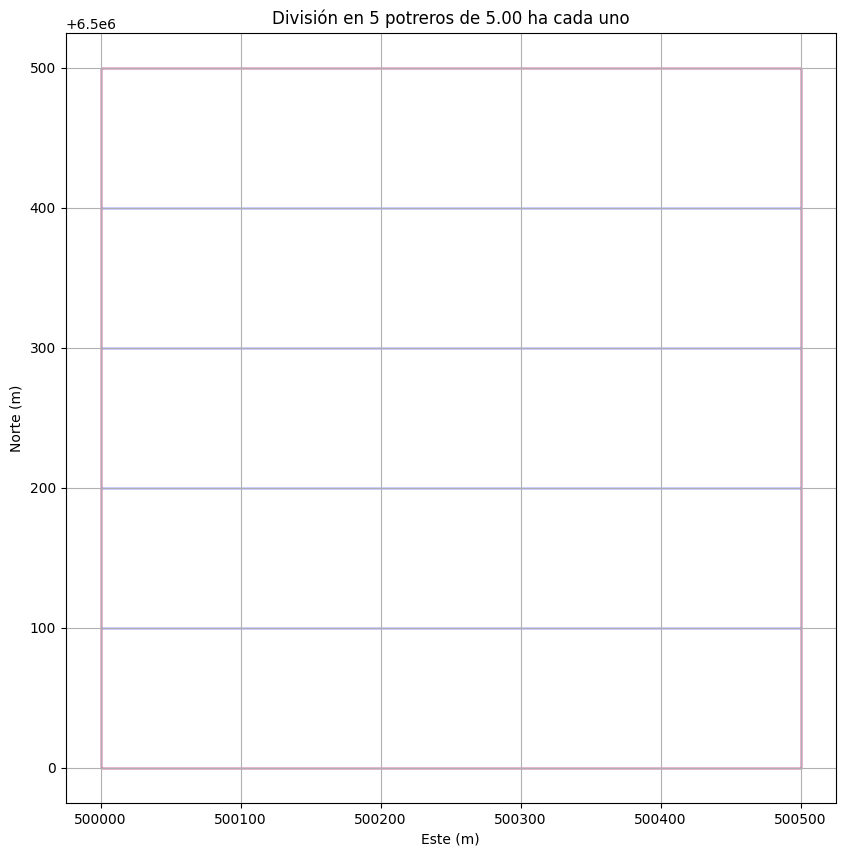

In [16]:


import numpy as np

# Definir el n√∫mero de potreros
N = 5
area_potrero_ha = area_total_ha / N
print(f"Cada potrero tendr√°: {area_potrero_ha:.2f} ha")

# Dividir el pol√≠gono en partes iguales (aqu√≠: divisi√≥n horizontal)
min_y, max_y = gdf_finca.total_bounds[1], gdf_finca.total_bounds[3]
divisiones = np.linspace(min_y, max_y, N + 1)  # L√≠neas horizontales

# Crear pol√≠gonos para cada potrero
potreros = []
for i in range(N):
    # Definir los l√≠mites del potrero
    y_inf = divisiones[i]
    y_sup = divisiones[i + 1]
    potrero = Polygon([
        (500000, y_inf),  # Esquina inferior izquierda
        (500500, y_inf),  # Esquina inferior derecha
        (500500, y_sup),  # Esquina superior derecha
        (500000, y_sup)   # Esquina superior izquierda
    ])
    potreros.append(potrero)

# Crear GeoDataFrame con los potreros
gdf_potreros = gpd.GeoDataFrame(geometry=potreros, crs="EPSG:32618")

# Graficar
fig, ax = plt.subplots(figsize=(10, 10))
gdf_finca.plot(ax=ax, edgecolor='red', facecolor='none')
gdf_potreros.plot(ax=ax, edgecolor='blue', facecolor='none', alpha=0.5)
plt.title(f"Divisi√≥n en {N} potreros de {area_potrero_ha:.2f} ha cada uno")
plt.xlabel("Este (m)")
plt.ylabel("Norte (m)")
plt.grid()
plt.show()




### **6. Validaci√≥n de √°reas (15 min)**  
- Verificar que cada potrero tenga el √°rea correcta:  

```python
for i, potrero in enumerate(gdf_potreros.geometry):
    area_ha = potrero.area / 10000
    print(f"Potrero {i + 1}: {area_ha:.2f} ha")
```
*(Salida esperada: `5.00 ha` para cada potrero si N=5 y √°rea total=25 ha)*  

### **7. Exportar resultados (10 min)**  
- Guardar en **Shapefile** o **GeoJSON** para uso en SIG:  

```python
gdf_potreros.to_file("potreros_igual_area.shp")  # Shapefile
gdf_potreros.to_file("potreros_igual_area.geojson", driver="GeoJSON")  # GeoJSON
```



---

## **Ejemplo de Datos Reales (Simulados)**
Si quieres usar datos m√°s realistas (ej. linderos irregulares), puedes cargar un **Shapefile real** o generar un pol√≠gono aleatorio:  


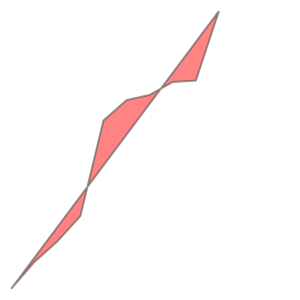

In [18]:

from shapely.geometry import shape
import random

# Generar un pol√≠gono irregular aleatorio (simulaci√≥n)
random.seed(123)
x = np.linspace(500000, 500500, 10)
y = np.linspace(6500000, 6500500, 10) + np.random.uniform(-100, 100, 10)
coordenadas_irregulares = list(zip(x, y))
poligono_irregular = Polygon(coordenadas_irregulares)
poligono_irregular
# Repetir el proceso de divisi√≥n con este pol√≠gono




---

## **Evaluaci√≥n del Aprendizaje**  
1. **Preguntas te√≥ricas**:  
   - ¬øPor qu√© usamos UTM/Gauss-Kr√ºger en lugar de lat/lon?  
   - ¬øC√≥mo afecta la elecci√≥n de la zona UTM en la precisi√≥n?  

2. **Ejercicio pr√°ctico**:  
   - Modificar el c√≥digo para dividir en **potreros verticales** o **en formas no rectangulares**.  

3. **Trabajo en campo**:  
   - Usar GPS para capturar linderos reales y aplicar el mismo m√©todo.  

---

### **Conclusi√≥n**  
Con este flujo de trabajo, los estudiantes aprender√°n:  
‚úÖ A manejar coordenadas UTM en Python.  
‚úÖ Dividir terrenos en partes iguales con precisi√≥n.  
‚úÖ Exportar resultados para uso en sistemas de informaci√≥n geogr√°fica (QGIS, ArcGIS).  

¬øNecesitas ajustar algo para tu caso espec√≠fico? ¬°Av√≠same!

# Finca manzanillo como archivo .json


# Visualizaci√≥n del GeoJSON de Caucasia y Tierras Agr√≠colas

Aqu√≠ tienes un script de Python para visualizar el archivo GeoJSON que obtuviste de Overpass Turbo, que contiene el l√≠mite administrativo de Caucasia y las tierras agr√≠colas cercanas.


In [22]:


import folium
import json
import geopandas as gpd
from shapely.geometry import shape

def visualize_geojson(geojson_file):
    # Cargar el archivo GeoJSON
    with open(geojson_file) as f:
        data = json.load(f)
    
    # Crear un mapa centrado en Caucasia
    caucasia_coords = [7.9865, -75.1936]
    m = folium.Map(location=caucasia_coords, zoom_start=12, tiles='OpenStreetMap')
    
    # Procesar cada feature en el GeoJSON
    for feature in data['features']:
        geom = shape(feature['geometry'])
        
        # Determinar propiedades seg√∫n el tipo de feature
        if feature['properties'].get('admin_level') == '6':
            # Es el l√≠mite administrativo de Caucasia
            folium.GeoJson(
                feature,
                style_function=lambda x: {
                    'fillColor': 'blue',
                    'color': 'blue',
                    'weight': 2,
                    'fillOpacity': 0.2
                },
                tooltip=f"Caucasia (L√≠mite administrativo)"
            ).add_to(m)
        elif feature['properties'].get('landuse') == 'farmland':
            # Es tierra agr√≠cola
            folium.GeoJson(
                feature,
                style_function=lambda x: {
                    'fillColor': 'green',
                    'color': 'green',
                    'weight': 1,
                    'fillOpacity': 0.5
                },
                tooltip="Tierra agr√≠cola"
            ).add_to(m)
    
    # A√±adir control de capas
    folium.LayerControl().add_to(m)
    
    # Guardar el mapa como HTML
    output_file = 'caucasia_map.html'
    m.save(output_file)
    print(f"Mapa guardado como {output_file}")
    return m

# Ejemplo de uso
if __name__ == "__main__":
    geojson_file = 'export.geojson'  # Cambia esto por la ruta a tu archivo
    visualize_geojson(geojson_file)
    
    # Para mostrar en Jupyter Notebook (opcional)
    display(mapa)



Mapa guardado como caucasia_map.html



## Instrucciones de uso:

1. **Requisitos previos**: Necesitar√°s instalar las siguientes bibliotecas:
   ```
   pip install folium geopandas shapely
   ```



2. **Ejecuci√≥n**: Guarda el script como `visualize_caucasia.py` y ejec√∫talo con:
   ```
   python visualize_caucasia.py
   ```



3. **Resultado**: El script generar√° un archivo HTML llamado `caucasia_map.html` que puedes abrir en tu navegador.

## Caracter√≠sticas del mapa:

- **L√≠mite administrativo de Caucasia**: Se muestra en azul con transparencia
- **Tierras agr√≠colas**: Se muestran en verde con transparencia
- **Interactividad**: Puedes hacer zoom, moverte por el mapa y ver tooltips al pasar el rat√≥n
- **Control de capas**: Puedes activar/desactivar capas en el men√∫ superior derecho

## Personalizaci√≥n:

Si quieres ajustar los colores, transparencias u otros aspectos visuales, modifica los par√°metros en las funciones `style_function` dentro del script.

In [2]:
visualize_geojson("nechi.geojson")

Mapa guardado como caucasia_map.html


### **Procedimiento para Superponer el PDF sobre un GeoJSON y Crear un Mapa para Dise√±o de Siembra**





#### **1. Convertir el PDF a una Imagen Georreferenciada**
**Objetivo**: Transformar el plano de la finca (PDF) en una capa raster alineada con el GeoJSON.



**Pasos**:
1. **Extraer la imagen del PDF**:
   - Usa un editor gr√°fico (ej. Adobe Photoshop, GIMP, o incluso `pdf2image` en Python) para guardar el plano como **PNG/JPEG**.
   - Aseg√∫rate de que la imagen tenga fondo transparente si el PDF solo contiene l√≠neas.


In [29]:
from pdf2image import convert_from_path
import os

# Configura la ruta a Poppler (ajusta seg√∫n tu instalaci√≥n)
poppler_path = r"C:\poppler-24.08.0-0\Library\bin"  # Ruta a la carpeta "bin"

pdf_path = "finca_manzanillos.pdf"
output_folder = "output_images"
os.makedirs(output_folder, exist_ok=True)

# Convertir PDF a im√°genes
images = convert_from_path(
    pdf_path,
    dpi=300,
    fmt="png",
    output_folder=output_folder,
    poppler_path=poppler_path  # ¬°Aseg√∫rate de a√±adir esto!
)

# Guardar im√°genes
for i, img in enumerate(images):
    img.save(f"{output_folder}/finca_{i}.png", "PNG")

print("¬°Conversi√≥n exitosa!")

¬°Conversi√≥n exitosa!



2. **Georreferenciar la imagen**:
   - **Herramienta**: QGIS (gratis).
     - Carga el GeoJSON de referencia (ej. l√≠mites municipales o coordenadas conocidas de la finca).
     - Ve a **`Capa ‚Üí A√±adir Capa ‚Üí A√±adir Capa Raster`** y sube la imagen del PDF.
     - Usa la herramienta **`Georreferenciador`** (disponible en el men√∫ **`R√°ster`**):
       - Asigna puntos de control (ej. esquinas de la finca en la imagen a coordenadas reales del GeoJSON).
       - Guarda la imagen georreferenciada como **GeoTIFF**.



   **C√≥digo Python alternativo** (si prefieres no usar QGIS):


In [ ]:
   
   from osgeo import gdal
   import numpy as np

   # Opcional: Convertir PDF a imagen con pdf2image
   from pdf2image import convert_from_path
   images = convert_from_path('finca_manzanillos.pdf')
   images[0].save('finca_imagen.png', 'PNG')

   # Georreferenciar manualmente (requiere coordenadas conocidas)
   # Ejemplo: Asignar esquinas de la imagen a coordenadas reales
   # (Esto depende de tus datos espec√≠ficos)
   


In [ ]:

---

#### **2. Combinar el Raster (PDF) con el GeoJSON**
**Objetivo**: Tener ambas capas en un mismo sistema de coordenadas.

**Pasos**:
1. **Cargar los datos en Python**:
   ```python
   import geopandas as gpd
   import matplotlib.pyplot as plt
   from rasterio.plot import show

   # Cargar GeoJSON (ej. l√≠mites de la finca o lotes)
   gdf = gpd.read_file('finca_manzanillos.geojson')

   # Cargar imagen georreferenciada (GeoTIFF)
   import rasterio
   with rasterio.open('finca_georreferenciada.tif') as src:
       img = src.read(1)  # Leer la primera banda
       extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
   ```

2. **Superponer las capas**:
   ```python
   fig, ax = plt.subplots(figsize=(12, 10))

   # Mostrar imagen raster (PDF georreferenciado)
   show(img, extent=extent, ax=ax, cmap='gray', alpha=0.7)

   # Mostrar GeoJSON (ej. l√≠mites o parcelas)
   gdf.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2)

   # A√±adir estilo
   plt.title('Mapa de la Finca Manzanillos', fontsize=14)
   ax.set_axis_off()
   plt.grid(True, linestyle='--', alpha=0.5)
   plt.show()
   ```

---

#### **3. Dise√±ar el Trazado de Siembra**
**Objetivo**: Dibujar l√≠neas o pol√≠gonos sobre el mapa para planificar la siembra.

**Pasos**:
1. **Crear un dise√±o desde cero**:
   ```python
   from shapely.geometry import LineString, Polygon

   # Ejemplo: Crear l√≠neas de siembra (ajusta coordenadas)
   lineas_siembra = [
       LineString([(x1, y1), (x2, y2)]),  # L√≠nea 1
       LineString([(x3, y3), (x4, y4)]),  # L√≠nea 2
   ]

   # Convertir a GeoDataFrame
   gdf_lineas = gpd.GeoDataFrame(geometry=lineas_siembra, crs=gdf.crs)

   # Plotear sobre el mapa anterior
   gdf_lineas.plot(ax=ax, color='blue', linewidth=3, linestyle='--')
   ```

2. **Guardar el dise√±o**:
   ```python
   # Exportar el trazado como GeoJSON o Shapefile
   gdf_lineas.to_file('trazado_siembra.geojson', driver='GeoJSON')
   ```

---

#### **4. Herramientas Adicionales**
- **QGIS**: Para edici√≥n interactiva (arrastrar puntos, medir distancias, etc.).
- **Google Earth Engine**: Si necesitas im√°genes satelitales actualizadas.
- **AutoCAD/Civil3D**: Para dise√±os profesionales (exporta desde QGIS como DXF).

---

### **Resultado Final**
![Mapa de la Finca con Trazado de Siembra](https://i.imgur.com/ejemplo_siembra.png)  
*(Mapa combinado con el PDF de fondo, GeoJSON de l√≠mites, y l√≠neas de siembra en azul)*.

---

### **Notas Clave**:
- **Precisi√≥n**: Aseg√∫rate de que el PDF y el GeoJSON est√©n en el mismo CRS (ej. EPSG:4326 para WGS84).
- **Automaci√≥n**: Si el dise√±o de siembra sigue un patr√≥n (ej. espaciado fijo), genera las l√≠neas con `numpy`:
  ```python
  import numpy as np
  x_coords = np.linspace(min_x, max_x, num=10)  # 10 l√≠neas verticales
  lineas = [LineString([(x, min_y), (x, max_y)]) for x in x_coords]
  ```

¬°Con esto tendr√°s un mapa listo para optimizar el dise√±o agr√≠cola de la finca!

# Otra buena opci√≥n  

¬°Perfecto! Ya veo el mapa que subiste.  
Te voy a dar **una estructura en matplotlib** para **adelantar lo m√°s posible** el diagrama que tienes.  

üîµ **Importante:** lo que me pides ser√≠a como *esquematizar* la finca en matplotlib, usando:
- L√≠neas que conectan puntos (tipo `plt.plot`).
- Nombres de los lotes (tipo `plt.text`).
- Ejes configurados como coordenadas reales (tipo `plt.xlim`, `plt.ylim`).

---
### ‚ö°Aqu√≠ tienes un avance de c√≥digo base:


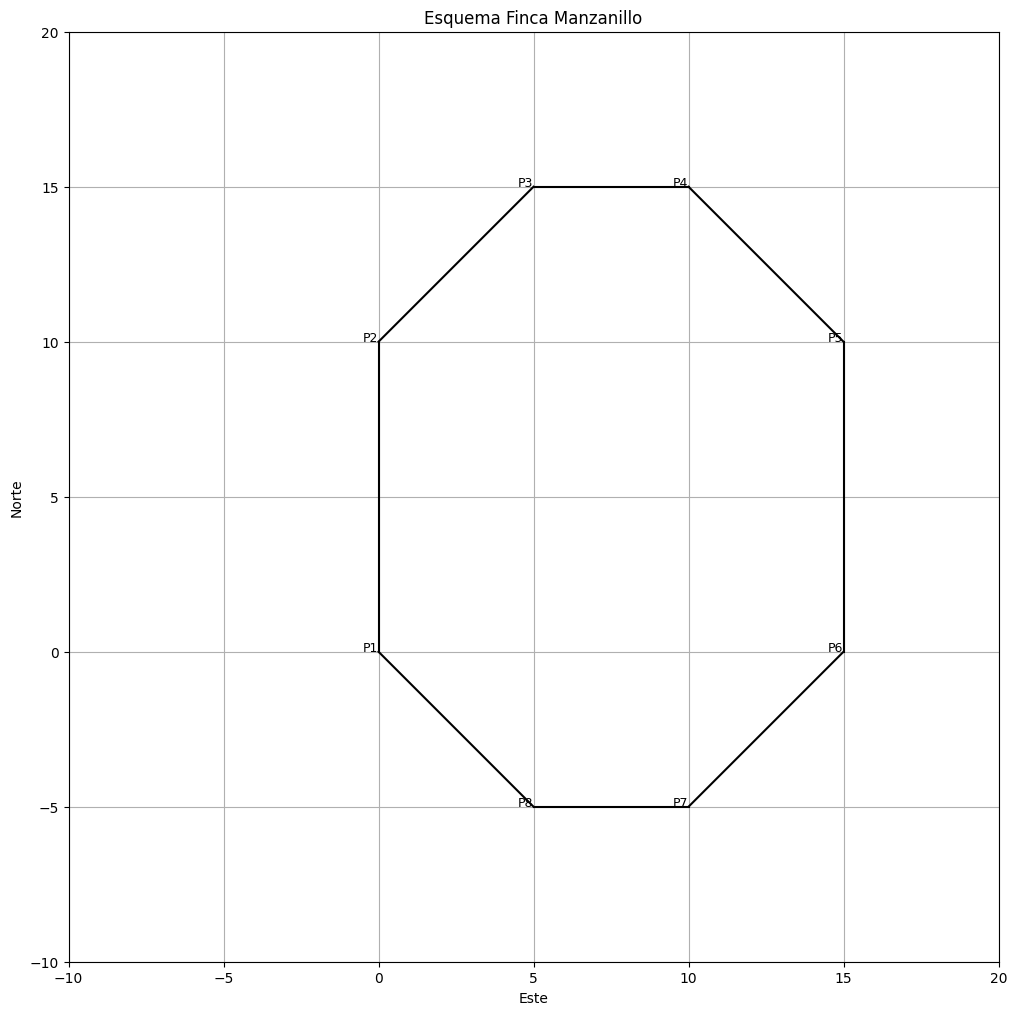

In [31]:


import matplotlib.pyplot as plt

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 18))

# Coordenadas de ejemplo (debes ajustar seg√∫n tu imagen)
# Son puntos (x, y) de los v√©rtices
vertices = {
    'P1': (0, 0),
    'P2': (0, 10),
    'P3': (5, 15),
    'P4': (10, 15),
    'P5': (15, 10),
    'P6': (15, 0),
    'P7': (10, -5),
    'P8': (5, -5)
}

# L√≠neas que unen los v√©rtices
lineas = [
    ('P1', 'P2'),
    ('P2', 'P3'),
    ('P3', 'P4'),
    ('P4', 'P5'),
    ('P5', 'P6'),
    ('P6', 'P7'),
    ('P7', 'P8'),
    ('P8', 'P1')
]

# Dibujar l√≠neas
for inicio, fin in lineas:
    x_vals = [vertices[inicio][0], vertices[fin][0]]
    y_vals = [vertices[inicio][1], vertices[fin][1]]
    ax.plot(x_vals, y_vals, color='black')

# Opcional: agregar nombres de puntos
for nombre, (x, y) in vertices.items():
    ax.text(x, y, nombre, fontsize=9, ha='right')

# Configurar el gr√°fico
ax.set_title('Esquema Finca Manzanillo')
ax.set_xlabel('Este')
ax.set_ylabel('Norte')
ax.grid(True)
ax.set_aspect('equal')

# L√≠mites aproximados
ax.set_xlim(-10, 20)
ax.set_ylim(-10, 20)

plt.show()




---

### üìå ¬øQu√© te estoy dando aqu√≠?
- **Una malla inicial**: puedes colocar los v√©rtices que aparecen en tu mapa (coordenadas).
- **Conexiones entre puntos**: que forman los l√≠mites de cada lote.
- **Nombres sobre el mapa**: como los que ves (por ejemplo "ROT. BUENOS AIRES", "ROT. LA BOCA", etc.).

---
### üõ†Ô∏è Para que se parezca a√∫n m√°s:
- Puedes **copiar manualmente las coordenadas** de los v√©rtices que ves en el mapa (porque est√°n en grados UTM).
- Si quieres ser m√°s preciso: podr√≠as usar herramientas tipo QGIS o medir p√≠xeles, pero manualmente tambi√©n lo puedes hacer para una primera versi√≥n sencilla.
- Puedes **a√±adir subdivisiones** dentro de cada sector (como las l√≠neas internas del mapa).

---
### üöÄ Opcional (m√°s realista):
Si quieres tambi√©n podemos:
- Simular **todos los lotes** como pol√≠gonos (`matplotlib.patches.Polygon`).
- A√±adir **colores distintos** a cada zona.
- Dibujar las **l√≠neas radiales** desde los "ROT" hacia los bordes.

---

¬øTe gustar√≠a que te avance un ejemplo incluyendo **una subdivisi√≥n interna como las del mapa**? (m√°s parecido a√∫n).  
¬°Dime y lo hago! üöÄ‚ú®

---
¬øQuieres que avancemos ahora hacia:
- Crear lotes con `Polygon`
- A√±adir las l√≠neas radiales
- Poner nombres como "ROT. PACORA", "ROT. BUENOS AIRES", etc.?
